# <center>ESTIMATING STANDARD ERRORS OF LOGISTIC REGRESSION MODEL USING BOOTSTRAP</center>

### We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression co-efficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the glm() function. Do not forget to set a random seed before beginning your analysis.
### (a) Using the summary() and glm() functions, determine the estimated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors.
### (b) Write a function, boot.fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.
### (c) Use the boot() function together with your boot.fn() function to estimate the standard errors of the logistic regression coefficients for income and balance.
### (d) Comment on the estimated standard errors obtained using the glm() function and using your bootstrap function.

# --------------------------------------------------------------------

### Default Dataset - The dataset consists of 10000 individuals and whether their credit card has defaulted or not. The main aim is to build the model using Logistic Regression and predict the accuracy of it . 
#### There are 4 attributes in the Dataset:
* 1. Default : Yes or No (Whether defaulted or Not).
* 2. Student : Yes or No (Whether Student or not).
* 3. Balance : Total Balance for given credit card holder.
* 4. Income : Gross Annual Income of credit card holder.

### 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading the Data

In [2]:
credData = pd.read_csv('Default.csv')
credData['student'] = credData['student'].map({'Yes': 1, 'No': 0})
credData['default'] = credData['default'].map({'Yes': 1, 'No': 0})

In [3]:
credData.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


### 3. Shape of the Data
__Shape of the data helps us understand the number of rows and number of columns present in out dataset.__

In [4]:
credData.shape

(10000, 4)

### 4. Handling Missing Values
* #### Let's see if our data has any missing values.
* #### If it does then we will handle it by replacing it with the appropriate value based on data</bold>

In [5]:
credData.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

#### There are no missing values in the Dataset

### 5. Descriptive Statistics of our Dataset

### 5.1 - Data type of all the variables in the Dataset

In [6]:
credData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


__We have Two Qualitative values and Two Quantitative values.__

### 5.2 - Describe() 
* #### This funtion allows us to observe the Count, Mean, Standard Deviation, Minimum value, Maximum Value, Quantile values

In [7]:
credData.describe()

,default,student,balance,income
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.033300,0.294400,835.374886,33516.981876
std,0.179428,0.455795,483.714985,13336.639563
min,0.000000,0.000000,0.000000,771.967729
25%,0.000000,0.000000,481.731105,21340.462903
50%,0.000000,0.000000,823.636973,34552.644802
75%,0.000000,1.000000,1166.308386,43807.729272
max,1.000000,1.000000,2654.322576,73554.233495


* #### The mean of Balance is 835.374886 and mean of Income is 33516.981876.
* #### Standard Deviation of Balance and Income is 483.714985 and 13336.639563 respectively.
* #### Minimum balance is 0 and Minimum income 771.96
* #### Maximum balance is 2654.322576 and Maximum income is 73554.233495.

### 6. Correlation in Dataset

In [8]:
credData.corr()

,default,student,balance,income
default,1.000000,0.035420,0.350119,-0.019871
student,0.035420,1.000000,0.203578,-0.753985
balance,0.350119,0.203578,1.000000,-0.152243
income,-0.019871,-0.753985,-0.152243,1.000000


### 6.1 Heatmap for Correlation values

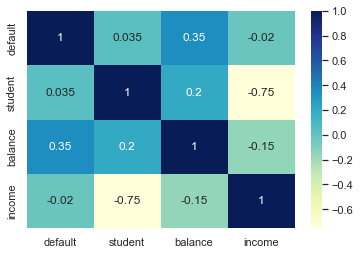

In [9]:
sns.set(rc={'figure.figsize' : (6,4)})
sns.heatmap(credData.corr(), cmap="YlGnBu", annot=True)
plt.show();

#### We can observe that there isn't much correlation between Balance and Income.

### 6.2 Pairplot to observe Correlation

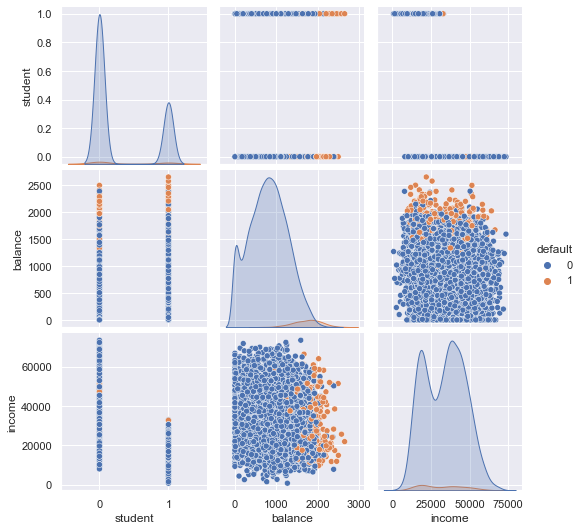

In [10]:
sns.set(rc={'figure.figsize' : (6,4)})
sns.pairplot(credData, hue='default')
plt.show();

* #### We can see from this pair plot that the Number of Defaulted credit are present when the balance is higher. There is association between balance and Defaulted credit which we can clearly observe in above plot.
* #### The defaulted loans are less in number.

### 6.3 Box Plot of `default` vs `Balance` and `Income`

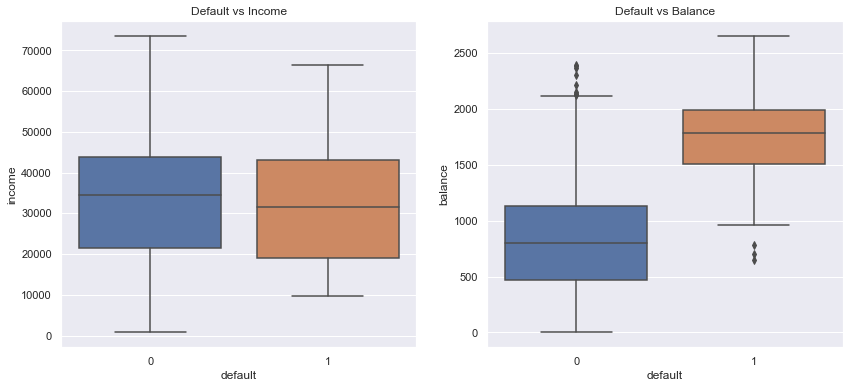

In [11]:
sns.set(rc={'figure.figsize': (14,6)})
fig, axs = plt.subplots(1, 2)
plt.subplot(1,2,1)
sns.boxplot(data=credData,x="default",y='income')
plt.title("Default vs Income")
plt.subplot(1,2,2)
sns.boxplot(data=credData,x="default",y='balance')
plt.title("Default vs Balance")
plt.show();

* __Default vs Income :__
__We can observe from the box plot that the income of defaulted credits and income of Not defaulted credit is almost in the same range. One intresting thing between Not Defaulted Loans and Defaulted Loans is that the minimum income of Not Defaulted Loan is way less than Defaulted Loan.__

* __Default vs Balance :__
__We can observe from the box plot that the Balance of defaulted credits is higher as compared to Balance of Not defaulted credit. We can say that Balance and Default are associated with each other__

### 6.4 Scatter Plot of Income vs Balance

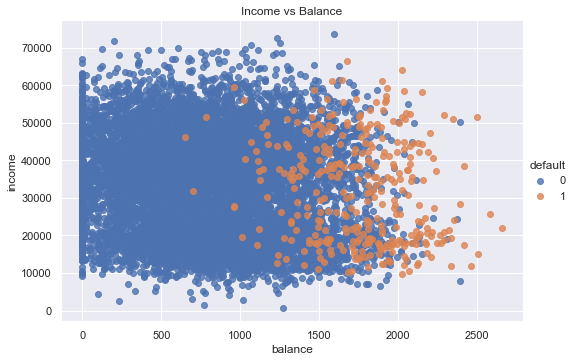

In [12]:
sns.lmplot(x='balance', y='income', hue='default',data=credData, aspect=1.5, fit_reg=False)
plt.title("Income vs Balance")
plt.show();

__In this scatter plot, All the Defaulted Credit are mostly on the higher side of the `balance` values and We have No NOT DEFAULTED CREDIT when the value of balance is below is less than 600 where as most of the DEFAULTED CREDIT lies where balance is more than 1500.__

### 7. Observe the Number of Loans defaulted and Not defaulted


In [13]:
credData.groupby('default').size()

default
0    9667
1     333
dtype: int64

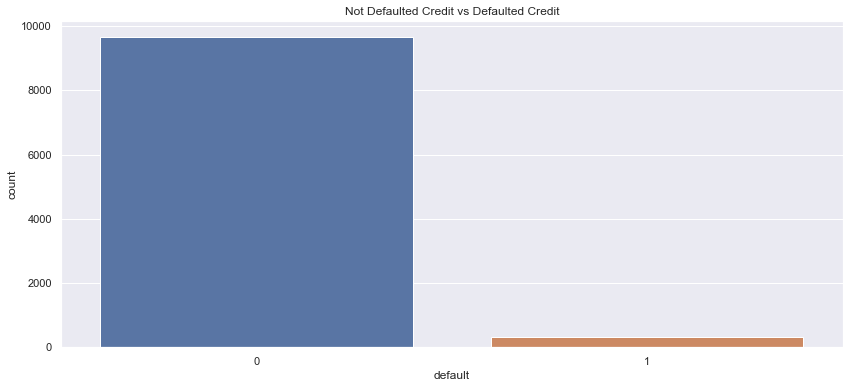

In [14]:
sns.countplot(x='default', data=credData, label='count')
plt.title("Not Defaulted Credit vs Defaulted Credit")
plt.show();

* We can see that the Number of loan defaulted is less as compared to loan Not Defaulted.
* This is a fair figure as usually in any Financial Institution the number of Loan defaulted is usually less but the __amount__ involved in those loan can be humongous.
* Number of Loan Defaulted = 333
* Number of Loan Not Defaulted = 9667

### 8. Logistic Regression Model

In [15]:
credData.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

### 8.1 Fitting the Logistic Regression Model
#### 8.1.1 Logistic regression Model using StatsModel

In [16]:
from statsmodels.formula.api import logit

In [17]:
credModel = logit("default ~ balance + income",credData).fit()
print(credModel.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sun, 30 Oct 2022   Pseudo R-squ.:                  0.4594
Time:                        03:21:55   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0

__From the Model Summary we can observe that `Balance` and `income` variable are significantly associated with Loan Defaulted.__

#### > The Standard Errors for Intercept, Balance and Income is 0.435, 0.000, and 4.99e-06 respectively. 

### 9. Function boot.fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.

In [18]:
from sklearn.utils import resample

#### 9.1 Boot Function

In [19]:
def boot(df):
    return resample(df)

#### 9.2 resampling the dataset using the Boot function

In [20]:
resampleData = boot(credData)
resampleData.head()

,default,student,balance,income
2579,0,1,1288.448560,21216.962574
8513,0,0,644.800255,32298.308567
8011,0,0,348.658868,36519.090186
6305,0,1,1010.212633,13469.866648
3656,0,0,891.887379,35062.538187


#### 9.3.2 Fitting the Model

In [21]:
model = logit("default ~ income + balance",resampleData).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.070470
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sun, 30 Oct 2022   Pseudo R-squ.:                  0.4688
Time:                        03:21:55   Log-Likelihood:                -704.70
converged:                       True   LL-Null:                       -1326.5
Covariance Type:            nonrobust   LLR p-value:                9.024e-271
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.9137      0.472    -25.250      0.000     -12.838     -10.989
income      1.759e-05   5.16

#### I tried resampling my Dataset for around 5 iterations and one noticeable thing which I observed is everytime I resample, the Standard errors for the intercept changes either increasing or decreasing. This particular observation tells me that resampling can be crucial for the model. Income and Balance are associated with default as the P value is < 0.05. 
#### The Standard errors for the model for Intercept, income and Balance is 0.462, 5.07e-06 and 0.0060 respectively.


### 10. Use the boot() function together with your boot.fn() function to estimate the standard errors of the logistic regression coefficients for income and balance.

In [39]:
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit

In [56]:
intercept = []
income = []
balance = []
model_error =[]

for i in range(1000):
    cred_resample = boot(credData)
    X = cred_resample[['income','balance']]
    X = sm.add_constant(X, prepend=True)
    y=cred_resample['default']
    
    model = Logit(y,X)
    result = model.fit(disp=False)
    model_error.append(result.bse)
    intercept.append(model_error[0][0])
    income.append(model_error[0][1])
    balance.append(model_error[0][2])
    
print("Bootstraped Standard Errors for Intercept : {}".format(sum(intercept)/1000))
print("Bootstraped Standard Errors for Income : {}".format(sum(income)/1000))
print("Botstraped Standard Errors for Balance : {}".format(sum(balance)/1000))

Bootstraped Standard Errors for Intercept : 0.42731255678252644
Bootstraped Standard Errors for Income : 5.07417994771207e-06
Botstraped Standard Errors for Balance : 0.00022305794637467134


* #### In this model we used the boot() function which we define earlier to resample data and we wrote a for loop for performing Iterations of resampling of Data, then we calculated Standard Errors for the Logistic Regression Model coefficients for Income and Balance.
* #### The Bootstrapped Standard Errors of Intercept, Income and Balance are 0.42731255678252644 , 5.07417994771207e-06 and 0.00022305794637467134 respectively.
* #### Standard Errors Rate in our general Logistic Regression Model (8) and our Bootstrapped Model is almost same. We didn't observe much change in terms of prediction and error rate. This is also because of the presence of very few Data points to train ourr model Defaulted credit value.